In [1]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [2]:
url='https://www.dsgap.gov.mo/pdpi/api/company/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r=requests.get(url, headers=headers)
data=r.json()

In [3]:
import re
regex=r'\(([^)]*)\)|\（([^）]*)\）'
regex=r'\((.*?)\)|\（(.*?)\）'

edges=[]
for company in data:
    company_name=company['name']
    try:
        for council in company['revision']['json']['architectureList']:
            for member in council['memberList']:
                member_name = re.sub(regex, '', member.get('name').get('tc'))
                if (member_name is not None) or (member_name==''):
                    edges.append((company_name, member_name))
    except:
        pass

edges=set(edges)

In [4]:

G=nx.Graph()
for node in edges:
    G.add_nodes_from([(node[0], {'type': 'company'})])
    G.add_nodes_from([(node[1], {'type': 'member'})])


for edge in edges:
    G.add_nodes_from(set([j for i in edges for j in i]), weight=1)
    G.add_edge(edge[0], edge[1])


In [9]:
weight={node[0]:1 if node[1]['type']=='member' else 10 for node in G.nodes(data=True)}
nx.set_node_attributes(G, weight ,'weight')


In [10]:
lst_member=[]
for node in G.nodes(data=True):
    if node[1]['type']=='member':
        lst_member.append(node[0])
G.degree(lst_member)

DegreeView({'阮佩賢': 1, '何子浩': 1, '京澳會計師事務所': 1, '何凱玲': 1, '林金城': 4, '周偉德': 1, '李可欣': 1, '蘇樹輝': 4, '梁竟成': 2, '容永恩': 1, '盧偉國': 1, '杜琪新': 1, '麥詠珠': 1, '雷慧敏': 1, '吳松': 4, '黃善文': 1, '馬健華': 2, '王丹': 13, '林品莊': 1, '鍾聖心': 2, '飛安達': 1, '何蔣祺': 1, '朱丹寧': 5, '林智超': 1, '簡焯坤': 6, '沈振耀': 1, '張佩萍': 1, '莫綺玲': 1, '胡嘉 ': 1, '阮家榮': 1, '容光亮': 2, '謝永強 ': 1, '劉佳華': 1, '趙鎮昌': 1, '施雨林': 2, '李志忠': 8, '彭倩華': 4, '梁金泉': 1, '盛力': 2, '梁以恆': 3, '教育基金': 2, '尚瑋': 13, '黃榮富': 1, '郭鋒': 1, '葛偉': 2, '黃平': 1, '李時泰': 6, '蔡炳祥': 1, '戴建業': 3, '余雨生': 3, '孫洪濤': 14, '鄺永': 1, '包敬燾': 1, '穆欣欣': 1, '柯嵐': 1, '林笑雲': 1, '江麗利': 2, '劉永誠': 2, '潘樂祺': 1, '黃嘉豪': 1, '高冠鵬': 1, '蕭志偉': 2, '吳建峰': 4, '陳俊翔': 1, '王志剛': 1, '何超瓊': 4, '袁泳貴': 1, '黃浩彪': 2, '陳穎雄': 2, '何美華': 2, '張展翔': 1, '徐建': 4, '譚志煒': 2, '邱庭彪': 2, '黃中原': 2, '龔志明': 1, '楊道匡': 1, '劉杏娟': 1, '沈程': 1, '韋海揚': 2, '何燕梅': 1, '鄧君明': 2, '謝思訓': 2, '稅兵': 4, '邵漢彬': 1, '馮嘉林': 2, '梁惠敏': 1, '劉雪瑩': 1, '何超鳳': 2, '孔兆偉': 1, '麥沛然': 1, '王菲': 1, '李詠瑜': 1, '余漢生': 1, '董濤': 2, '梁華權': 1, '胡達忠': 1, '吳景松': 1, '傅建國': 1, '蘇

305.0


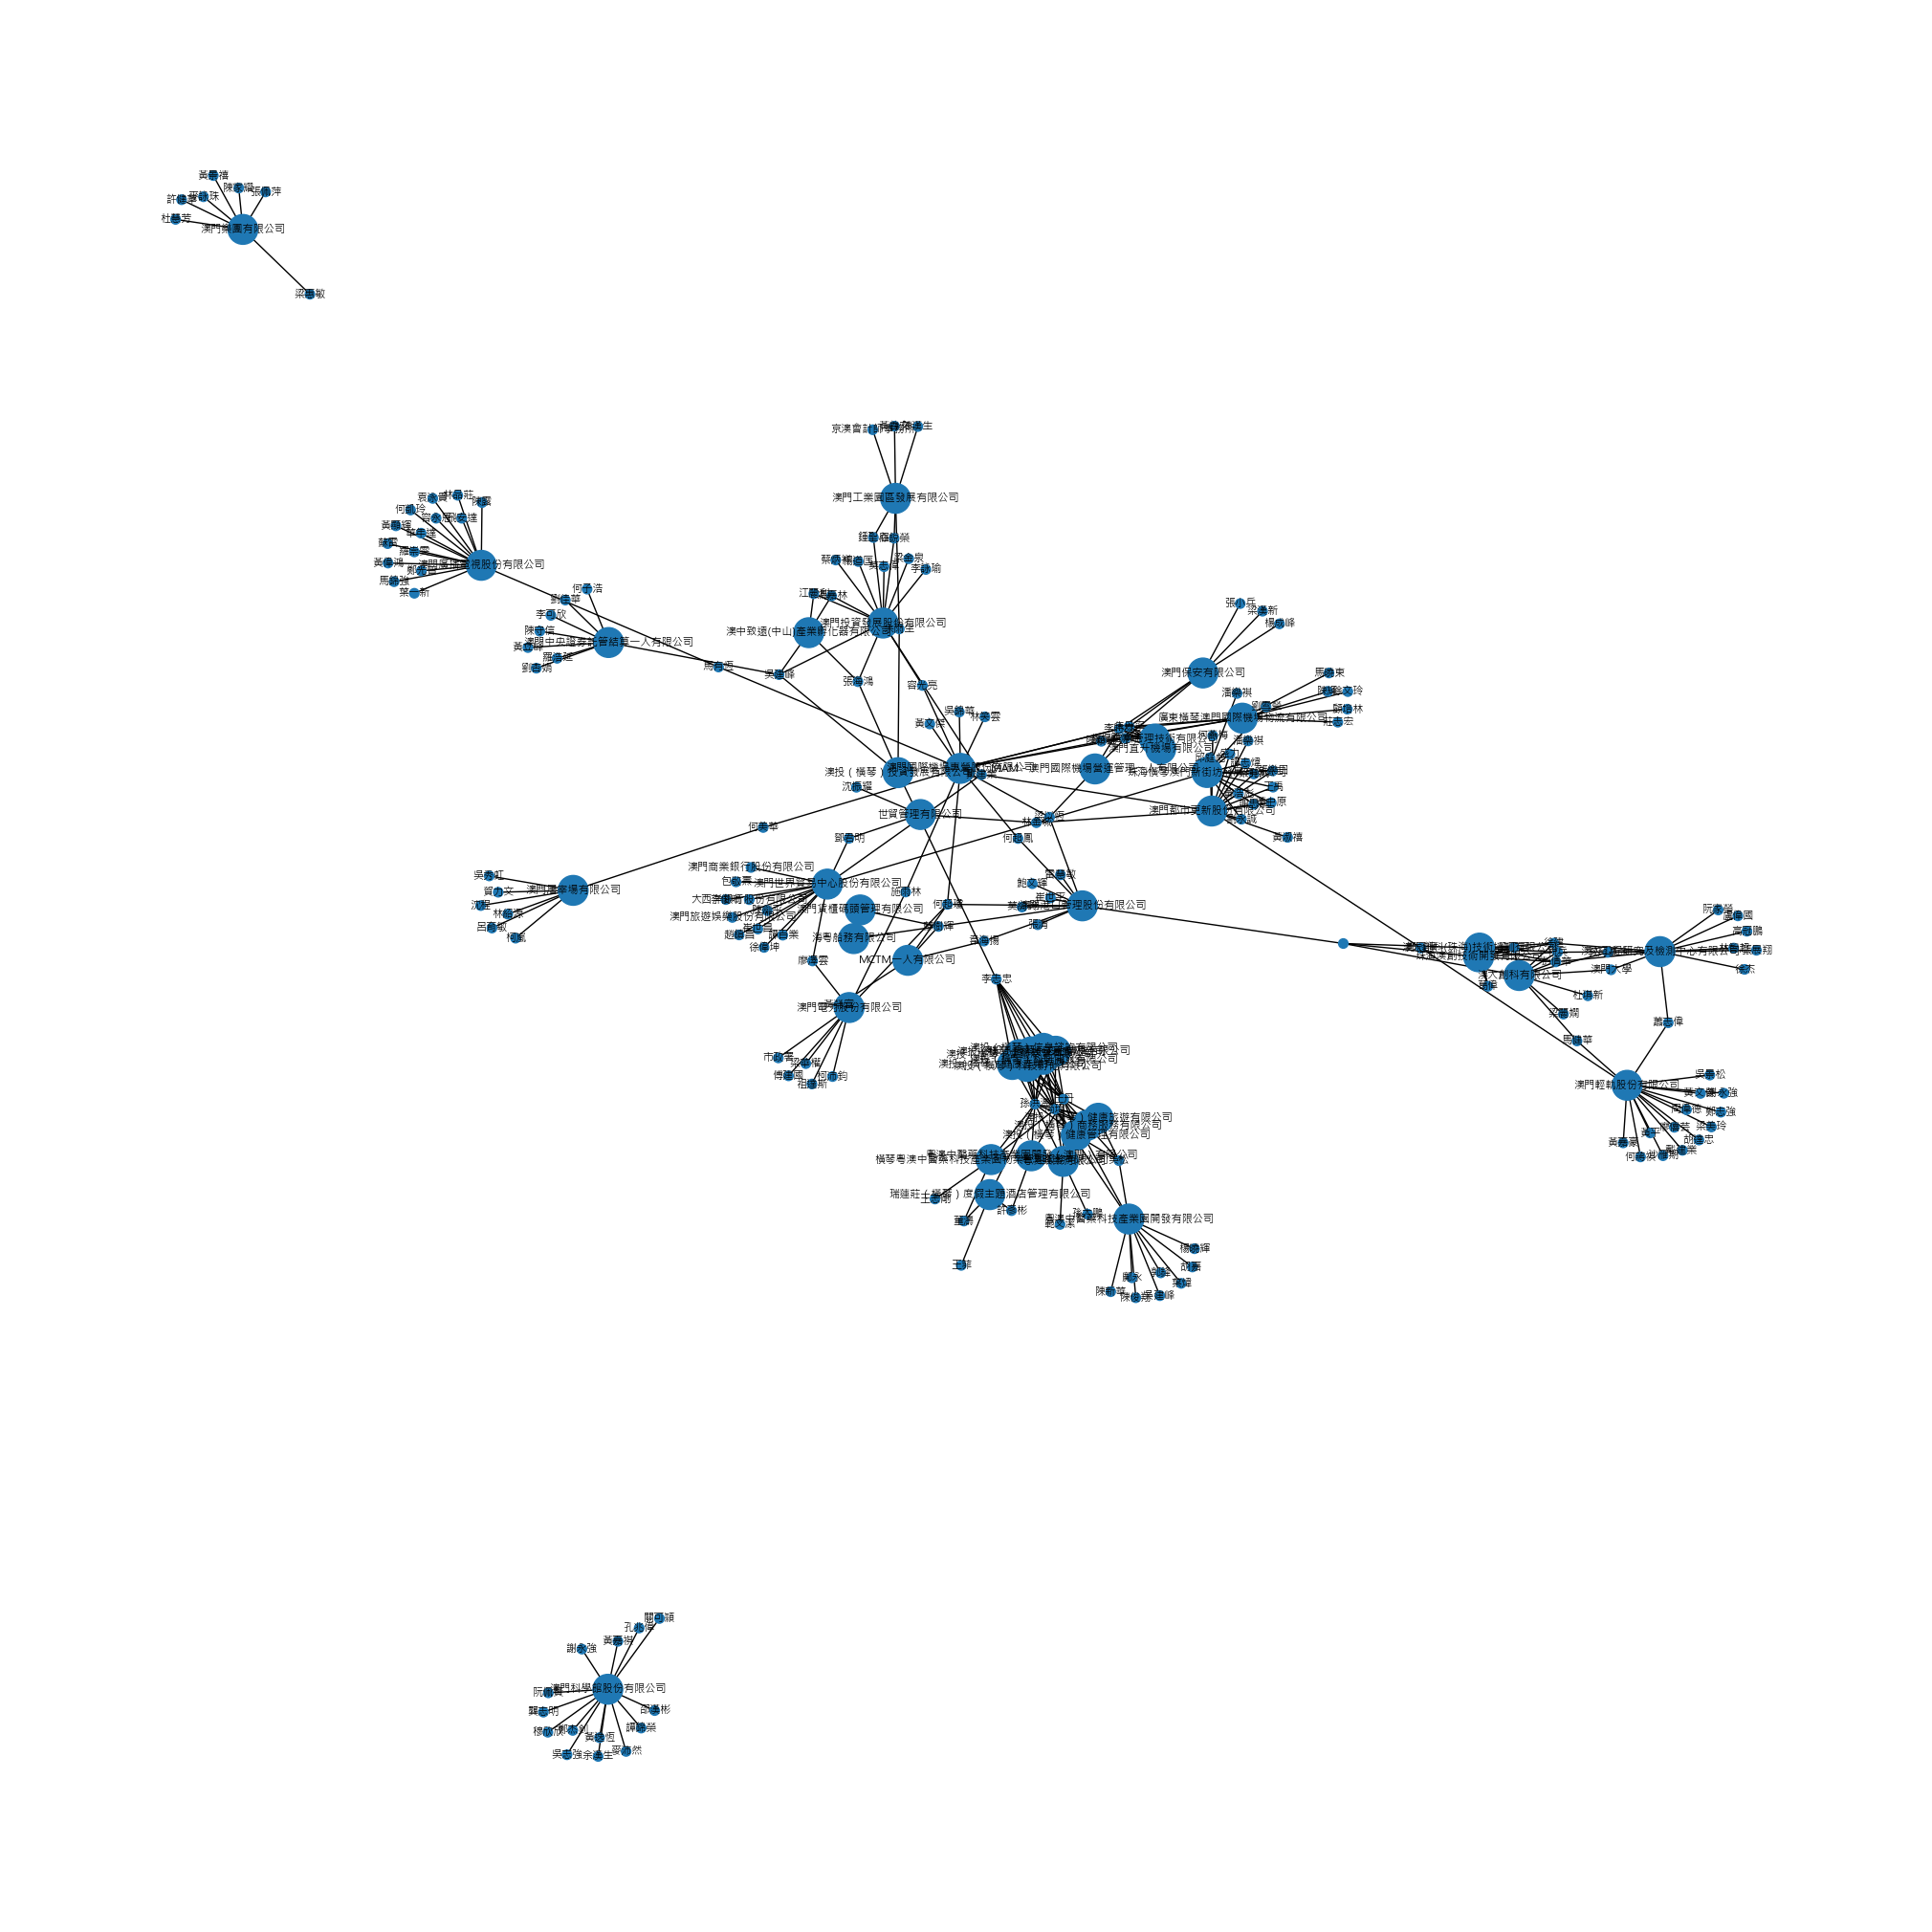

In [12]:
plt.rcParams['font.sans-serif']='Microsoft JhengHei'
print(G.size(weight="weight"))
plt.figure(3,figsize=(20,20)) 
nx.draw_spring(G, with_labels=True, node_size=[i*50 for i in nx.get_node_attributes(G,'weight').values()] ,font_size=8)